<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
# A:
sac_df = pd.read_csv(sac_csv)
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
sac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [5]:
#The first thing that stands out to me is the column 'sq__ft'
#I don't like the '__' so I'm going to rename it
sac_df.rename(columns = {'sq__ft' : 'sqft'}, inplace = True)

In [6]:
sac_df['street'].sort_values(ascending = True)
#no symbol values, column looks clean

422          1 KENNELFORD CIR
144            10 SEA FOAM CT
542            100 CHELSEA CT
571       100 CRYSTALWOOD CIR
588       100 CRYSTALWOOD WAY
                ...          
281             993 MANTON CT
642           9937 BURLINE ST
758         9949 NESTLING CIR
718        9967 HATHERTON WAY
322    9970 STATE HIGHWAY 193
Name: street, Length: 985, dtype: object

In [7]:
sac_df['city'].value_counts()
#no symbol values, column looks clean

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
FAIR OAKS            9
CAMERON PARK         9
WILTON               5
AUBURN               5
ELVERTA              4
GOLD RIVER           4
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
WEST SACRAMENTO      3
EL DORADO            2
LOOMIS               2
WALNUT GROVE         1
SHINGLE SPRINGS      1
FORESTHILL           1
MEADOW VISTA         1
GARDEN VALLEY        1
COOL                 1
SLOUGHHOUSE          1
DIAMOND SPRINGS      1
PENRYN               1
GREENWOOD            1
MATHER               1
Name: city, dtype: int64

In [8]:
#I was checking to see if all the 'state' entries were CA so I could possible drop the column,
#however, one entry is 'AC'. There's not 'state' 'AC', however, so should I drop this data point?
sac_df['state'].value_counts()

CA    984
AC      1
Name: state, dtype: int64

In [9]:
#finding the 'AC' culprit:
sac_df.loc[sac_df['state'] == 'AC']

#note, this entry has negative sqft, price, and latitude: it may be corrupted data
#although it may be that the lat, long are long, lat instead.

#I'm going to drop this row.

,street,city,zip,state,beds,baths,sqft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [10]:
#dropping the row based on index
sac_df = sac_df.drop([703])

In [11]:
#all states 'CA'
sac_df['state'].value_counts()

CA    984
Name: state, dtype: int64

In [12]:
#reviewing the columns 'sale_date' is a bit extra,
#no times are recorded other than 00:00
sac_df['sale_date'].value_counts()

#Is there a way to convert the time to a better/more readable format?

Mon May 19 00:00:00 EDT 2008    268
Fri May 16 00:00:00 EDT 2008    263
Tue May 20 00:00:00 EDT 2008    177
Wed May 21 00:00:00 EDT 2008    158
Thu May 15 00:00:00 EDT 2008    118
Name: sale_date, dtype: int64

In [13]:
#https://www.marsja.se/pandas-convert-column-to-datetime/
sac_df['sale_date'] = pd.to_datetime(sac_df['sale_date'])
sac_df['sale_date'].value_counts()

C:\Users\Mary\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


2008-05-19    268
2008-05-16    263
2008-05-20    177
2008-05-21    158
2008-05-15    118
Name: sale_date, dtype: int64

In [14]:
# A:
#checking for null values
sac_df.isnull().sum().sort_values()

#note to self, was this redundant because .info()
#already shows there were no null counts?

street       0
city         0
zip          0
state        0
beds         0
baths        0
sqft         0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [15]:
round(sac_df.describe().drop('count').T, 2)

,mean,std,min,25%,50%,75%,max
zip,95750.61,85.18,95603.00,95660.00,95762.00,95828.0,95864.00
beds,2.91,1.31,0.00,2.00,3.00,4.0,8.00
baths,1.78,0.90,0.00,1.00,2.00,2.0,5.00
sqft,1315.25,853.42,0.00,951.50,1304.00,1718.5,5822.00
price,234167.84,138434.22,1551.00,145000.00,214375.00,300000.0,884790.00
latitude,38.61,0.15,38.24,38.48,38.63,38.7,39.02
longitude,-121.36,0.14,-121.55,-121.45,-121.38,-121.3,-120.60


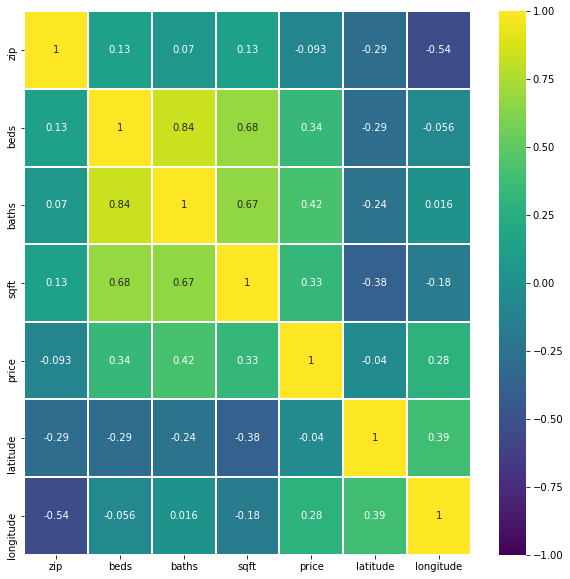

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(sac_df.corr(),
            #mask = np.triu(sac_df.corr()),
            annot=True,
            vmin = -1,
            vmax = 1,
            linewidths = 1,
            cmap = 'viridis');

- There's a strong positive correlation between the number of baths and the number of beds
- There's also a strong negative correlation between zip code and longitude but that makes sense because they're directly related 

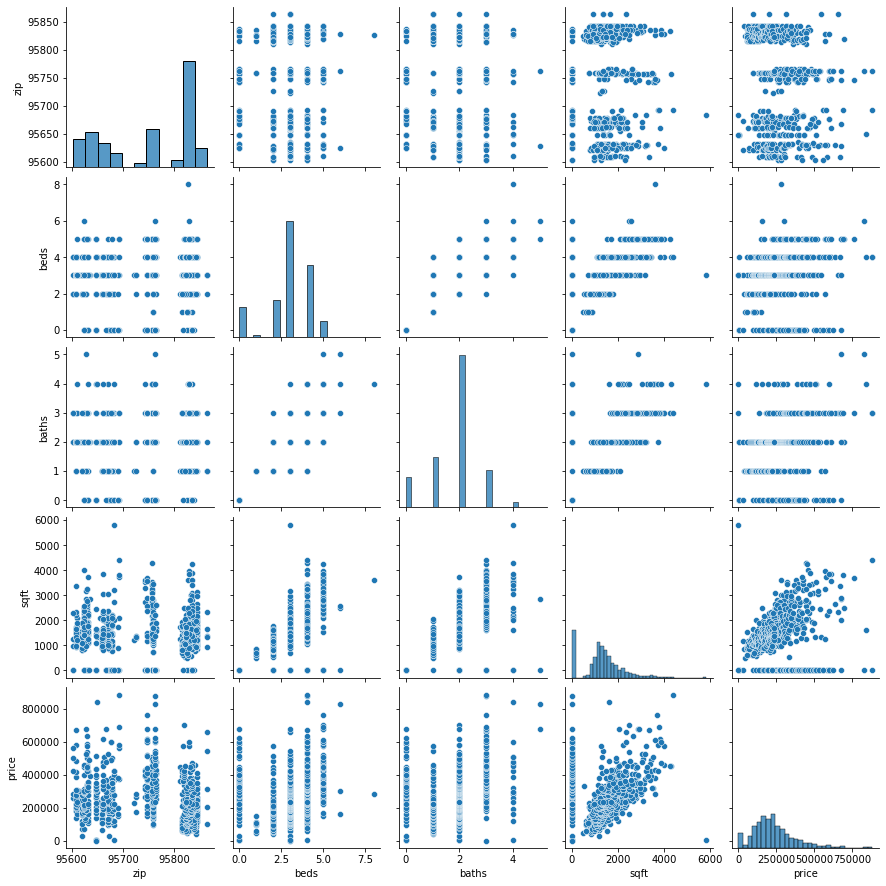

In [17]:
sns.pairplot(sac_df[['zip', 'beds', 'baths', 'sqft', 'price']]);

In [18]:
#upon reviewing the pairplot I see we have entries where 'sqft' and 'price' are zero.
#the entries where sqft = 0, beds = 0, baths = 0 must be lots with no homes.
sac_df['sqft'].value_counts()

0       171
1120      8
795       6
1410      5
1039      5
       ... 
1376      1
1375      1
1373      1
1371      1
2824      1
Name: sqft, Length: 603, dtype: int64

In [19]:
#https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
#alternate method that doesn't involve .drop()
#sac_df[sac_df.sqft == 0]

#https://datatofish.com/select-rows-pandas-dataframe/
zero_sqft_beds = sac_df.loc[(sac_df['sqft'] == 0) & (sac_df['beds'] == 0)]
empty_lots_df = zero_sqft_beds.loc[(sac_df['baths'] == 0)]

#taking a look at the empty lots, should still consider them in real estate prices:
empty_lots_df.head()

#testing to make sure non-zeros were removed:
#zero_sqft_beds.loc[(sac_df['baths'] == 0)]['beds'].value_counts()
#zero_sqft_beds.loc[(sac_df['baths'] == 0)]['baths'].value_counts()

,street,city,zip,state,beds,baths,sqft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,2008-05-21,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21,339500,38.602416,-121.542965


In [20]:
#It turns out none of the home prices were 0, I read the plot wrong
sac_df['price'].sort_values(ascending = True)

865      1551
866      2000
576      4897
583      4897
584      4897
        ...  
553    760000
157    830000
334    839000
863    879000
864    884790
Name: price, Length: 984, dtype: int64

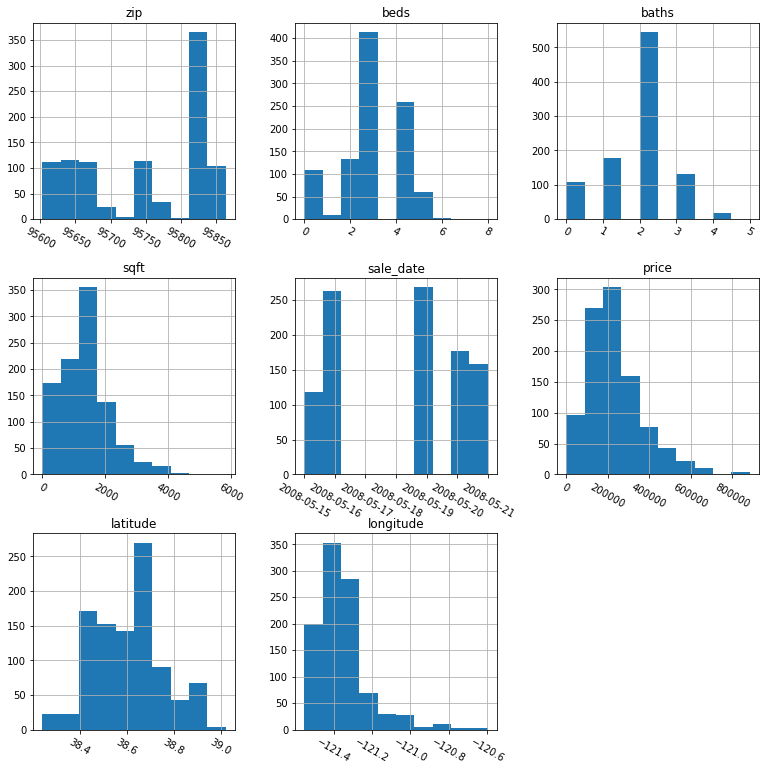

In [21]:
sac_df.hist(figsize=(13, 13), xrot = -30);

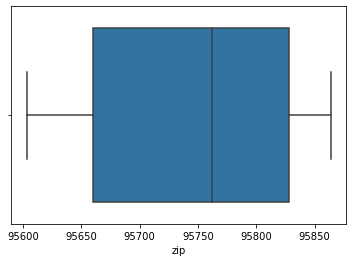

In [22]:
sns.boxplot(x = sac_df['zip']);

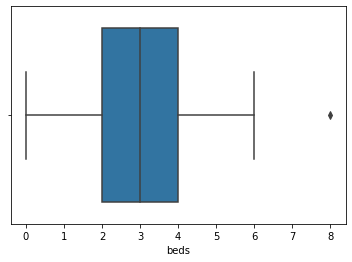

In [23]:
sns.boxplot(x = sac_df['beds']);

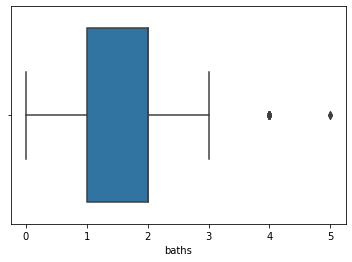

In [24]:
#I'm curious why the boxplots for beds and baths look so different, I thought they were both discrete variables
sns.boxplot(x = sac_df['baths']);

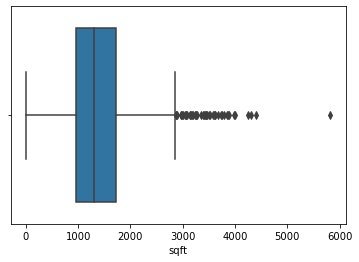

In [25]:
sns.boxplot(x = sac_df['sqft']);

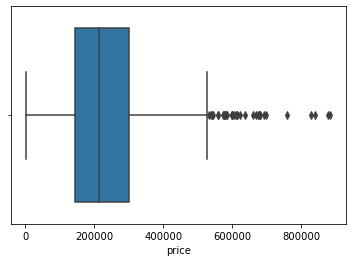

In [26]:
sns.boxplot(x = sac_df['price']);

**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. 

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [27]:
sac_df.shape

(984, 12)

In [28]:
sac_df.head()

,street,city,zip,state,beds,baths,sqft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768


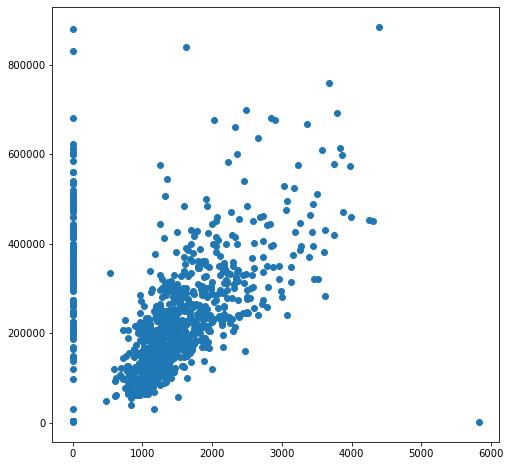

In [29]:
plt.figure(figsize = (8, 8))
plt.scatter(sac_df['sqft'], sac_df['price']);

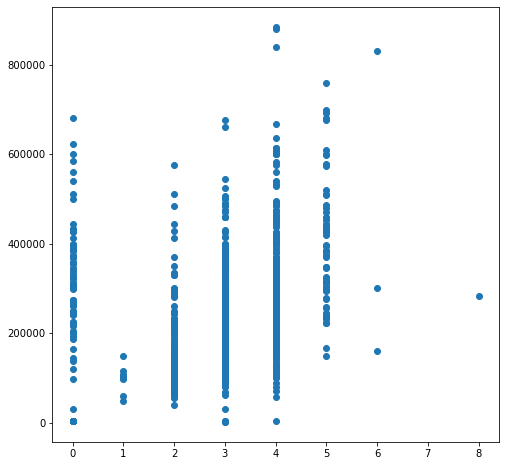

In [30]:
plt.figure(figsize = (8, 8))
plt.scatter(sac_df['beds'], sac_df['price']);

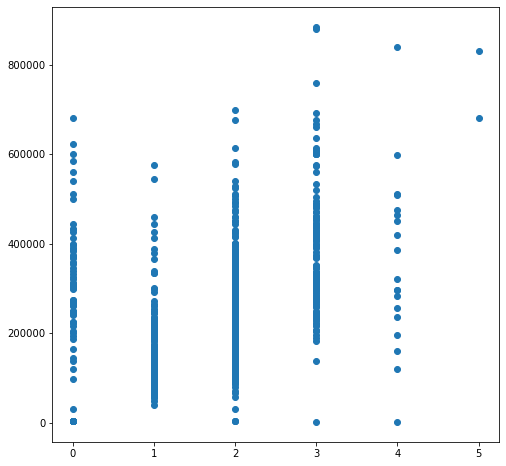

In [31]:
plt.figure(figsize = (8, 8))
plt.scatter(sac_df['baths'], sac_df['price']);

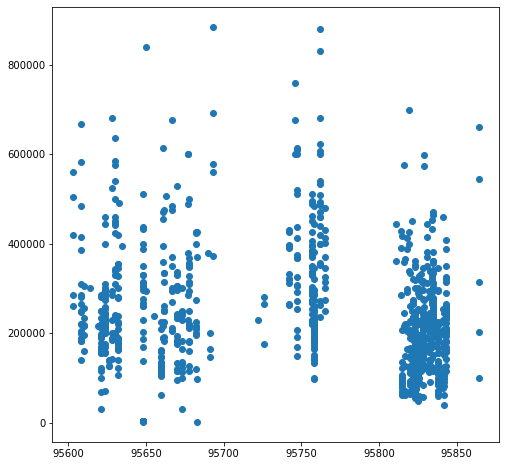

In [32]:
plt.figure(figsize = (8, 8))
plt.scatter(sac_df['zip'], sac_df['price']);

In [33]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics 

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [34]:
sac_df.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

# A:
'sqft' would be the best predictor of y in our SLR model because it has the most range of values. 'beds' and 'baths' can also be thought of as categorical values for which there can be '1', '2', etc. number of each. From a practical standpoint, 'zip' and 'sale_date' are not the best predictors either because price can widely vary within a single zip code and sale_date is likely incidental. 

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [35]:
#remember: minimize one of MSE, RSE, or SSE and you minimze the others

In [36]:
#from linear_reg_lesson:
def line_of_best_fit(x, y):

    # Calculate the five "ingredients."
    y_bar = y.mean()
    x_bar = x.mean()
    std_y = y.std()
    std_x = x.std()
    r_xy = np.corrcoef(x, y)[0][1]

    # Calculate the betas.
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - beta_1 * x_bar

    # Return line of best fit.
    return beta_0 + beta_1 * x

In [37]:
sac_df['Linear_Yhat'] = line_of_best_fit(sac_df['sqft'], sac_df['price'])

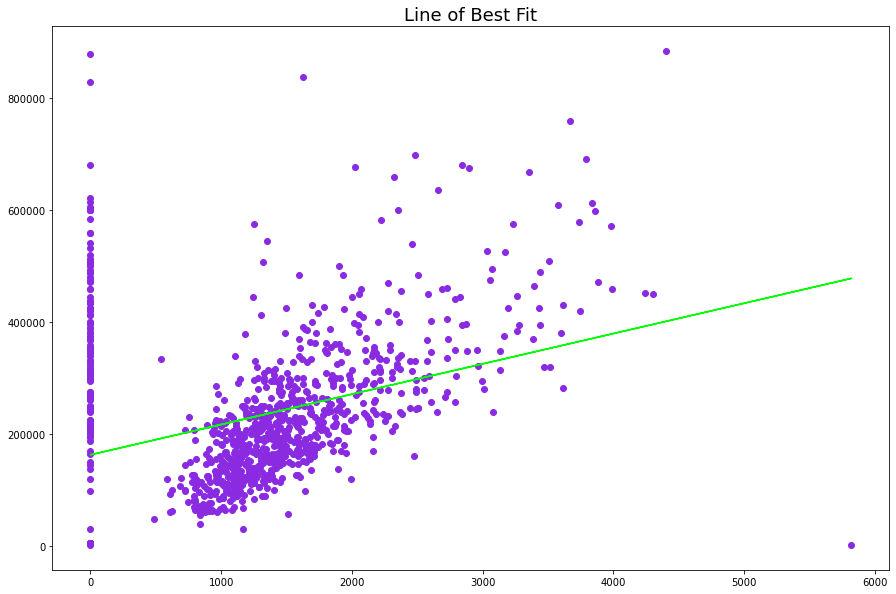

In [38]:
# Create a figure.
plt.figure(figsize=(15,10))

#generating a scatterplot of data.
plt.scatter(sac_df['sqft'],
            sac_df['price'],
            color = 'blueviolet')

# generating a line for prediction.
plt.plot(sac_df['sqft'],
         sac_df['Linear_Yhat'],
         color = 'lime')

#setting title
plt.title('Line of Best Fit', fontsize = 18, loc = 'center');

In [39]:
# A:
#based on linear_reg_lesson:
def beta_readout(x, y):

    # Calculate the five "ingredients."
    y_bar = y.mean()
    x_bar = x.mean()
    std_y = y.std()
    std_x = x.std()
    r_xy = np.corrcoef(x, y)[0][1]

    # Calculate the betas.
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - beta_1 * x_bar

    # Return line of best fit.
    return beta_0, beta_1

In [40]:
beta_readout(sac_df['sqft'], sac_df['price'])

(162938.73756098625, 54.15619752295766)

### 6. Interpret the intercept. Interpret the slope.

# A:
If a domicile had zero square feet, the expected price would be \\$162,938.74. As the sqft of a domicile increases so does the price by a rate of \\$54.16 per square foot, **holding all else constant**. 

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

# A:
The above model could be used for prediction: if we were given either the cost or the total square footage for a house, we could predict what the total square footage (or cost, whichever value we're missing) based on the the given value and the line of best fit. Inference would be given the cost or square footage. how does the other feature impact it? ie. the effect of the feature(s) on the result. 

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [41]:
sac_df['mean_yhat'] = np.mean(sac_df['price'])
print(np.mean(sac_df['price']))

234167.84146341463


In [42]:
# A:
def MSE(y_hat, y_true):
    diff = y_true - y_hat
    sq_diff = diff ** 2
    return np.mean(sq_diff)

MSE(sac_df['mean_yhat'], sac_df['price'])
#note to self DELETE LATER DELETE LATER DELETE LATER DELETE LATER DELETE LATER DELETE LATER
#does this MSE make sense given the mean of $229471.13?

19144557865.460644

In [43]:
MSE(sac_df['mean_yhat'], sac_df['price']) ** 0.5

138363.86040242098

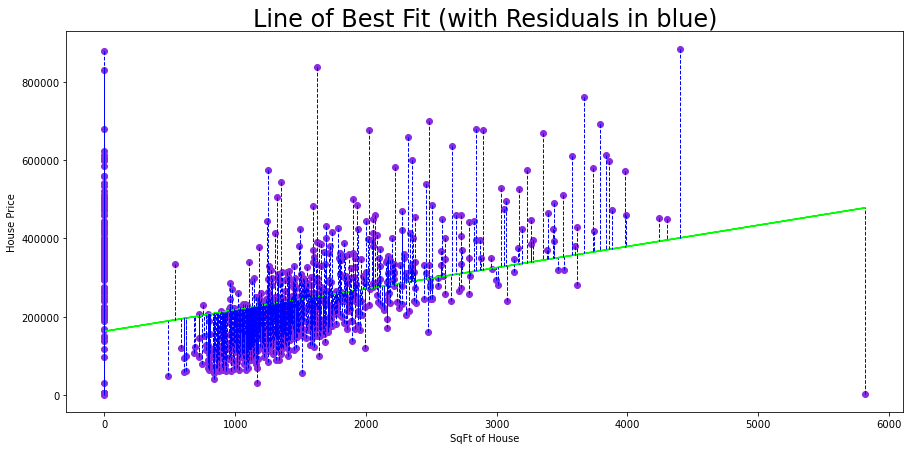

In [44]:
plt.figure(figsize=(15,7))

# Generate a scatterplot of our data.
plt.scatter(sac_df['sqft'],
            sac_df['price'],
            color = 'blueviolet')

# generating a line for prediction.
plt.plot(sac_df['sqft'],
         sac_df['Linear_Yhat'],
         color = 'lime')

# Iterate over our DataFrame, plotting a dashed line 
# from each observed value to its predicted value.
# Code originally written by Marc Harper.
for _, row in sac_df.iterrows():
    plt.plot((row['sqft'], row['sqft']),
             (row['price'], row['Linear_Yhat']),
             color = 'blue',
             linestyle = '--',
             lw=1)
    
# Create a title.
plt.title('Line of Best Fit (with Residuals in blue)', fontsize = 24)
plt.xlabel("SqFt of House")
plt.ylabel("House Price");

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [45]:
# A:
type_dummies = pd.get_dummies(sac_df['type'])
type_dummies.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [46]:
#bed_dummies = pd.get_dummies(sac_df['beds'], prefix = 'beds')
#bed_dummies.head()

In [47]:
#bath_dummies = pd.get_dummies(sac_df['baths'], prefix = 'baths')
#bath_dummies.head()

In [48]:
date_dummies = pd.get_dummies(sac_df['sale_date'], dtype = str)
date_dummies.head()

,2008-05-15,2008-05-16,2008-05-19,2008-05-20,2008-05-21
0,,,,,1
1,,,,,1
2,,,,,1
3,,,,,1
4,,,,,1


In [49]:
sac_df = sac_df.join(type_dummies)
sac_df.head()

,street,city,zip,state,beds,baths,sqft,type,sale_date,price,latitude,longitude,Linear_Yhat,mean_yhat,Condo,Multi-Family,Residential,Unkown
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,208213.318690,234167.841463,0,0,1,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028,226139.020070,234167.841463,0,0,1,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839,206047.070789,234167.841463,0,0,1,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146,209079.817851,234167.841463,0,0,1,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768,206101.226987,234167.841463,0,0,1,0


In [50]:
#sac_df = sac_df.join(bed_dummies)

In [51]:
#sac_df = sac_df.join(bath_dummies)

In [52]:
sac_df = sac_df.join(date_dummies)

In [53]:
sac_df.head()

,street,city,zip,state,beds,baths,sqft,type,sale_date,price,...,mean_yhat,Condo,Multi-Family,Residential,Unkown,2008-05-15 00:00:00,2008-05-16 00:00:00,2008-05-19 00:00:00,2008-05-20 00:00:00,2008-05-21 00:00:00
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,...,234167.841463,0,0,1,0,,,,,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,...,234167.841463,0,0,1,0,,,,,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,...,234167.841463,0,0,1,0,,,,,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,...,234167.841463,0,0,1,0,,,,,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,...,234167.841463,0,0,1,0,,,,,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [54]:
sac_df.drop(columns = 'Unkown', inplace = True)

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [55]:
#sac_df.drop(['Linear_Yhat', 'mean_yhat'], axis = 1, inplace = True)
sac_df.head()

,street,city,zip,state,beds,baths,sqft,type,sale_date,price,...,Linear_Yhat,mean_yhat,Condo,Multi-Family,Residential,2008-05-15 00:00:00,2008-05-16 00:00:00,2008-05-19 00:00:00,2008-05-20 00:00:00,2008-05-21 00:00:00
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,...,208213.318690,234167.841463,0,0,1,,,,,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,...,226139.020070,234167.841463,0,0,1,,,,,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,...,206047.070789,234167.841463,0,0,1,,,,,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,...,209079.817851,234167.841463,0,0,1,,,,,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,...,206101.226987,234167.841463,0,0,1,,,,,1


In [56]:
sac_df.columns

Index([           'street',              'city',               'zip',
                   'state',              'beds',             'baths',
                    'sqft',              'type',         'sale_date',
                   'price',          'latitude',         'longitude',
             'Linear_Yhat',         'mean_yhat',             'Condo',
            'Multi-Family',       'Residential', 2008-05-15 00:00:00,
       2008-05-16 00:00:00, 2008-05-19 00:00:00, 2008-05-20 00:00:00,
       2008-05-21 00:00:00],
      dtype='object')

In [57]:
# A:
features = sac_df[['zip', 'sqft', 'beds', 
                   'baths', 'Condo', 'Multi-Family']]
X = features
y = sac_df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    train_size = 0.8)

In [58]:
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)

LinearRegression()

In [60]:
model.score(X_train, y_train)

0.21856695669256887

In [61]:
model.score(X_test, y_test)

0.15467160925160295

In [62]:
model.coef_

array([-1.58025258e+02,  7.47727462e+00, -2.57823626e+03,  6.72515943e+04,
       -5.15152248e+04, -9.70282483e+04])

In [63]:
model.intercept_

15248804.599316506

In [64]:
#this line of code is useful for printing out the feature/coef_ pairs
[f'{X.columns[i]}: {model.coef_[i]}' for i in range (len(X.columns))]

['zip: -158.02525769400003',
 'sqft: 7.477274620248042',
 'beds: -2578.2362571937347',
 'baths: 67251.59429472861',
 'Condo: -51515.22475375915',
 'Multi-Family: -97028.24831396519']

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [65]:
# A: 
y_preds = model.predict(X_test)

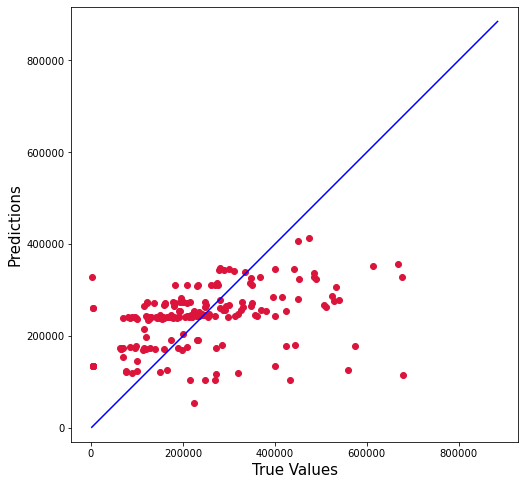

In [66]:
#https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_preds, c='crimson')

p1 = max(max(y_preds), max(y))
p2 = min(min(y_preds), min(y))
         
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [67]:
resids = y_test - y_preds
resids.head()

74     -34678.695239
178    -78147.128788
872   -103634.598860
763      2116.051197
874   -153413.616142
Name: price, dtype: float64

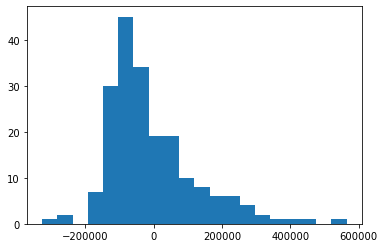

In [68]:
plt.hist(resids, bins = 20);

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  SLR is LINE assumptions

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  MLR is LINEI assumptions
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

# A:
One assumption that my model violated was Equality of Variance, or homoscedasticity. As the price of a house increased the residuals increased, leading to a 'cloud-like' spread of that data that is considered to be heteroscedastic. Additionally, the model violates Normality of errors, the errors do not follow a Normal distribution. 

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [69]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [70]:
# A:
#https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2

def r2_adj(samp_size, ind_var):
    r2 = metrics.r2_score(y_test, y_preds)
    return (1 - (1 - r2) * (samp_size - 1) / (samp_size - ind_var - 1))

In [71]:
#984 *.2 = 196.8, round to 197
r2_adj(197, 6)

0.12797702849112724

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
# A:
#want to include: MAE, SSE, MSE, RMSE, R2, and R2_adj
def regress_metrics(y_test, y_preds, samp_size, ind_var):
    
    MAE = metrics.mean_absolute_error(y_test, y_preds)
    
    SSE = np.sum((y_test - y_preds) ** 2)
    
    MSE = metrics.mean_squared_error(y_test, y_preds)
    
    RMSE = np.sqrt(MSE)
    
    r2 = metrics.r2_score(y_test, y_preds)
    
    r2adj = r2_adj(samp_size, ind_var) 
    
    return [{'MAE' : MAE,
            'SSE' : SSE, 
            'MSE' : MSE, 
            'RMSE' : RMSE,
            'r2' : r2,
            'r2_adj' : r2adj}]

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [74]:
# A:
regress_metrics(y_test, y_preds, 984, 6)

[{'MAE': 100348.31456036828,
  'SSE': 3329498642528.2793,
  'MSE': 16901008337.707,
  'RMSE': 130003.87816410324,
  'r2': 0.15467160925160295,
  'r2_adj': 0.14948023735345517}]

In [75]:
features = sac_df[['zip', 'sqft', 'beds', 
                   'baths']]
X = features
y = sac_df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    train_size = 0.8)

In [76]:
model = LinearRegression()

In [77]:
model.fit(X_train, y_train)

LinearRegression()

In [78]:
model.score(X_train, y_train)

0.19073924626810745

In [79]:
model.score(X_test, y_test)

0.1945139788939999

- Dropping the type of domicile better fits the testing data data. This is a bad model, as bad as the original. 

In [80]:
bed_dummies = pd.get_dummies(sac_df['beds'], prefix = 'beds')
bed_dummies.head()

,beds_0,beds_1,beds_2,beds_3,beds_4,beds_5,beds_6,beds_8
0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [81]:
bath_dummies = pd.get_dummies(sac_df['baths'], prefix = 'baths')
bath_dummies.head()

,baths_0,baths_1,baths_2,baths_3,baths_4,baths_5
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [82]:
sac_df = sac_df.join(bed_dummies)
sac_df = sac_df.join(bath_dummies)

In [83]:
sac_df.head().drop(columns = ['Linear_Yhat', 'mean_yhat'])

,street,city,zip,state,beds,baths,sqft,type,sale_date,price,...,beds_4,beds_5,beds_6,beds_8,baths_0,baths_1,baths_2,baths_3,baths_4,baths_5
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,...,0,0,0,0,0,1,0,0,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,...,0,0,0,0,0,1,0,0,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,...,0,0,0,0,0,1,0,0,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,...,0,0,0,0,0,1,0,0,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,...,0,0,0,0,0,1,0,0,0,0


In [84]:
sac_df.columns

Index([           'street',              'city',               'zip',
                   'state',              'beds',             'baths',
                    'sqft',              'type',         'sale_date',
                   'price',          'latitude',         'longitude',
             'Linear_Yhat',         'mean_yhat',             'Condo',
            'Multi-Family',       'Residential', 2008-05-15 00:00:00,
       2008-05-16 00:00:00, 2008-05-19 00:00:00, 2008-05-20 00:00:00,
       2008-05-21 00:00:00,            'beds_0',            'beds_1',
                  'beds_2',            'beds_3',            'beds_4',
                  'beds_5',            'beds_6',            'beds_8',
                 'baths_0',           'baths_1',           'baths_2',
                 'baths_3',           'baths_4',           'baths_5'],
      dtype='object')

In [96]:
features = sac_df[['zip', 'sqft',
                   'Condo', 'Multi-Family',
                   'latitude', 'longitude',
                   'beds_0', 'beds_1', 'beds_2', 'beds_3', 'beds_4', 'beds_5', 'beds_6',
                   'baths_0', 'baths_1', 'baths_2', 'baths_3', 'baths_4']]
X = features
y = sac_df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    train_size = 0.8)

In [97]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
model.score(X_train, y_train)

0.3668453563663807

In [90]:
model.score(X_test, y_test)

0.35793546947587984

- Alright! Included the (lat., long.) and dummy columns for beds and baths really improved my score! I've got low variance, less than 2%. 

In [99]:
city_dummies = pd.get_dummies(sac_df['city'], prefix = 'city')
city_dummies.head()

,city_ANTELOPE,city_AUBURN,city_CAMERON PARK,city_CARMICHAEL,city_CITRUS HEIGHTS,city_COOL,city_DIAMOND SPRINGS,city_EL DORADO,city_EL DORADO HILLS,city_ELK GROVE,...,city_RANCHO MURIETA,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [104]:
sac_df = sac_df.join(city_dummies)

In [105]:
city_dummies.columns

Index(['city_ANTELOPE', 'city_AUBURN', 'city_CAMERON PARK', 'city_CARMICHAEL',
       'city_CITRUS HEIGHTS', 'city_COOL', 'city_DIAMOND SPRINGS',
       'city_EL DORADO', 'city_EL DORADO HILLS', 'city_ELK GROVE',
       'city_ELVERTA', 'city_FAIR OAKS', 'city_FOLSOM', 'city_FORESTHILL',
       'city_GALT', 'city_GARDEN VALLEY', 'city_GOLD RIVER',
       'city_GRANITE BAY', 'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS',
       'city_MATHER', 'city_MEADOW VISTA', 'city_NORTH HIGHLANDS',
       'city_ORANGEVALE', 'city_PENRYN', 'city_PLACERVILLE',
       'city_POLLOCK PINES', 'city_RANCHO CORDOVA', 'city_RANCHO MURIETA',
       'city_RIO LINDA', 'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
       'city_SHINGLE SPRINGS', 'city_SLOUGHHOUSE', 'city_WALNUT GROVE',
       'city_WEST SACRAMENTO', 'city_WILTON'],
      dtype='object')

In [106]:
features = sac_df[['zip', 'sqft',
                   'Condo', 'Multi-Family',
                   'latitude', 'longitude',
                   'beds_0', 'beds_1', 'beds_2', 'beds_3', 'beds_4', 'beds_5', 'beds_6',
                   'baths_0', 'baths_1', 'baths_2', 'baths_3', 'baths_4',
                   'city_ANTELOPE', 'city_AUBURN', 'city_CAMERON PARK', 'city_CARMICHAEL',
                   'city_CITRUS HEIGHTS', 'city_COOL', 'city_DIAMOND SPRINGS',
                   'city_EL DORADO', 'city_EL DORADO HILLS', 'city_ELK GROVE',
                   'city_ELVERTA', 'city_FAIR OAKS', 'city_FOLSOM', 'city_FORESTHILL',
                   'city_GALT', 'city_GARDEN VALLEY', 'city_GOLD RIVER',
                   'city_GRANITE BAY', 'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS',
                   'city_MATHER', 'city_MEADOW VISTA', 'city_NORTH HIGHLANDS',
                   'city_ORANGEVALE', 'city_PENRYN', 'city_PLACERVILLE',
                   'city_POLLOCK PINES', 'city_RANCHO CORDOVA', 'city_RANCHO MURIETA',
                   'city_RIO LINDA', 'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
                   'city_SHINGLE SPRINGS', 'city_SLOUGHHOUSE', 'city_WALNUT GROVE',
                   'city_WEST SACRAMENTO' ]]

X = features
y = sac_df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    train_size = 0.8)

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
model.score(X_train, y_train)

0.5725148373031264

In [109]:
model.score(X_test, y_test)

0.5710912341604889

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

# A: 
My final model is in the sweet spot. Both the scores for training and testing data are extremely close to one another. Although the model is not great, we'd want to account for 80% of the errors, we account for about 57% of the errors. 